In [255]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [256]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [257]:
cd /Users/austinmcdonald/Desktop/Extraction-Both-200Vcm/

/Users/austinmcdonald/Desktop/Extraction-Both-200Vcm


In [258]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
#files.remove('Gol-350.txt')
#files.remove('Sig-350.txt')
files.sort()
files

['Gol-0000.txt',
 'Gol-0250.txt',
 'Gol-0500.txt',
 'Gol-1000.txt',
 'Gol-1500.txt',
 'Gol-2000.txt',
 'Gol-2500.txt',
 'Gol-3000.txt',
 'Gol-3500.txt',
 'Sig-0000.txt',
 'Sig-0250.txt',
 'Sig-0500.txt',
 'Sig-1000.txt',
 'Sig-1500.txt',
 'Sig-2000.txt',
 'Sig-2500.txt',
 'Sig-3000.txt',
 'Sig-3500.txt']

In [259]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['Gol-0000',
 'Gol-0250',
 'Gol-0500',
 'Gol-1000',
 'Gol-1500',
 'Gol-2000',
 'Gol-2500',
 'Gol-3000',
 'Gol-3500',
 'Sig-0000',
 'Sig-0250',
 'Sig-0500',
 'Sig-1000',
 'Sig-1500',
 'Sig-2000',
 'Sig-2500',
 'Sig-3000',
 'Sig-3500']

In [260]:
ml = 1e3
avg=10
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

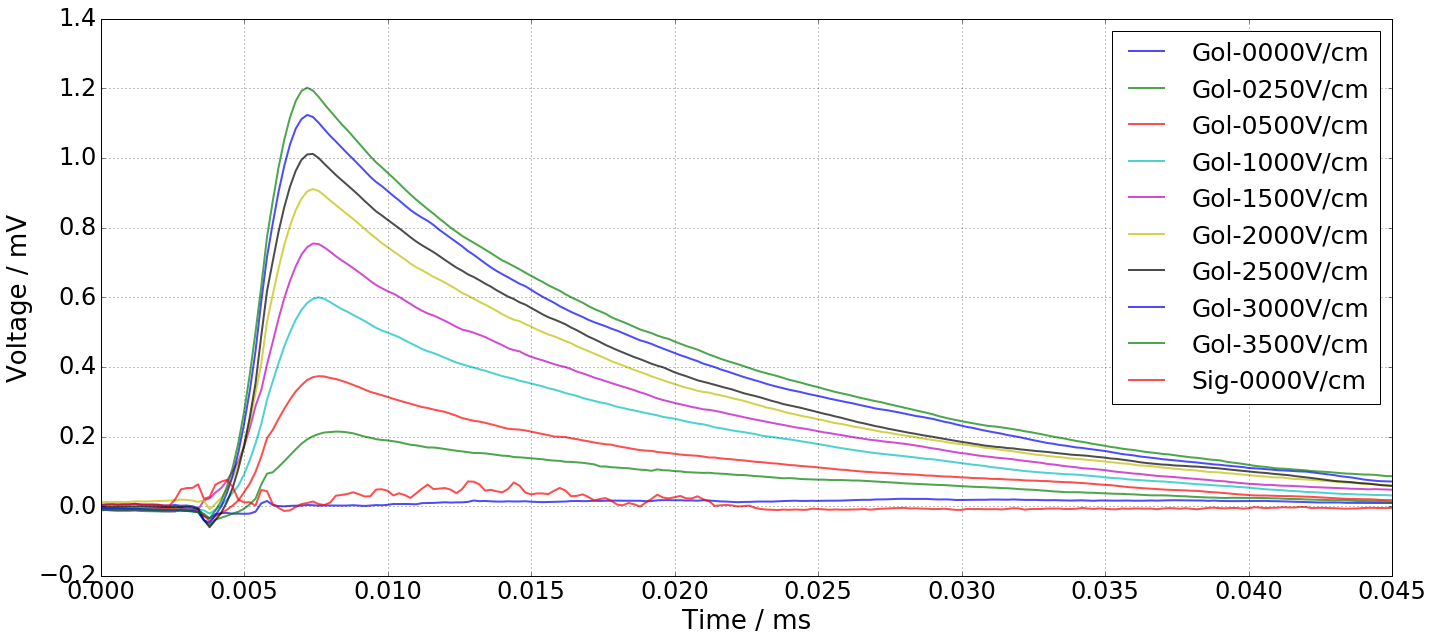

In [289]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)-8):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-0.2,0.45)
plt.xlim(0,0.045)

#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

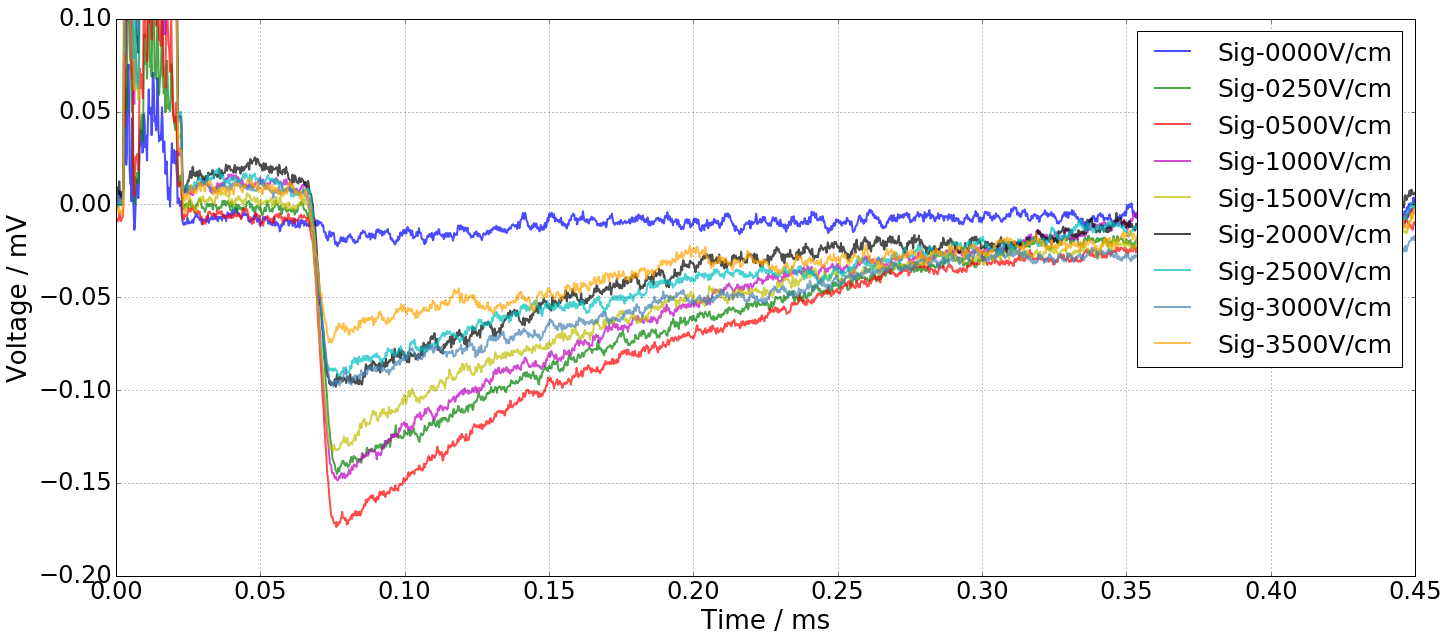

In [262]:
plt.figure(figsize=(20,9))
col = ['b','g','r','m','y','k','c','steelblue','orange']
for q in range(9,len(files)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2,color=col[q-9])
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.45)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')
plt.ylim(-0.2,.1)

plt.show()

In [263]:
aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

NameError: name 'GX200' is not defined

In [ ]:
plt.figure(figsize=(20,9))

A = 0+1
B = 9+1

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.5)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.45,linewidth=2,color='m')
plt.axvline(0.065,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')

print(GOLDsum)
print(SIGsum)

plt.show()

In [264]:
GOLD  = []
SIG   = []
GOLDM = []
SIGM  = []
extr  = []
for x in range(0,8):
    A = 0+x
    B = 9+x
    EXT = int(names[x].split('-')[1])
    extr.append(EXT)
    Corr = EXT/200
    
    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.45)
    R = np.where(XX == aa)[0][0]
    GOLDsum = sum(abs(YY[L:R]))
    GOLDM.append( max(abs(YY[L:R])))
    GOLD.append(GOLDsum)
    
    
    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.35)
    R = np.where(XX == aa)[0][0]
    SIGsum = sum(abs(YY[L:R]))*Corr
    SIGM.append(max(abs(YY[L:R]))*Corr)
    SIG.append(SIGsum)

In [265]:
SIG

[0.0,
 114.77358940235067,
 265.28784641877564,
 418.04221795533181,
 608.02040218318939,
 580.82834849563756,
 774.76191292289229,
 1111.6240550552582]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


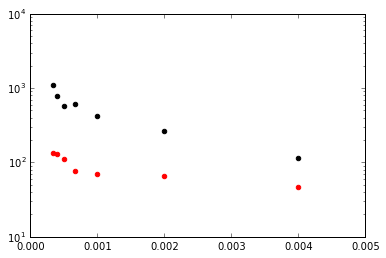

In [266]:

plt.scatter(1/np.array(extr),SIG,color='k')
plt.scatter(1/np.array(extr),GOLD,color='r')
plt.semilogy()
plt.xlim(0,0.005)
plt.show()

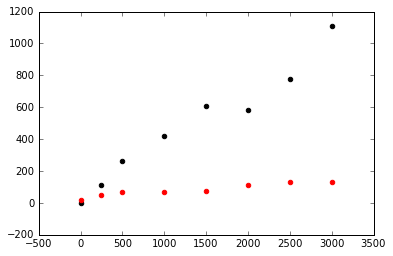

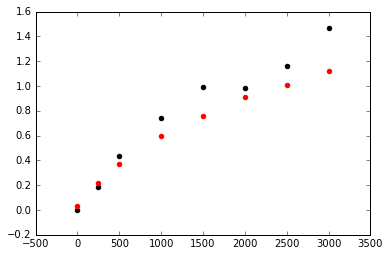

In [267]:
plt.scatter(extr,SIG,color='k')
plt.scatter(extr,GOLD,color='r')
plt.show()

plt.scatter(extr,SIGM,color='k')
plt.scatter(extr,GOLDM,color='r')
plt.show()

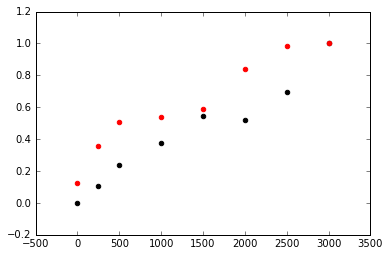

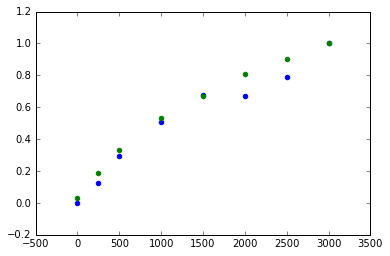

In [268]:
plt.scatter(extr,SIG/max(SIG),color='k')
plt.scatter(extr,GOLD/max(GOLD),color='r')
plt.show()
plt.scatter(extr,SIGM/max(SIGM),color='b')
plt.scatter(extr,GOLDM/max(GOLDM),color='g')
plt.show()

In [269]:
func(xx,100,5)

array([  1.00000000e+02,   8.17078421e+01,   6.67617146e+01,
         5.45495564e+01,   4.45712654e+01,   3.64182192e+01,
         2.97565410e+01,   2.43134276e+01,   1.98659770e+01,
         1.62320611e+01,   1.32628669e+01,   1.08368023e+01,
         8.85451733e+00,   7.23483504e+00,   5.91142759e+00,
         4.83009992e+00,   3.94657042e+00,   3.22465753e+00,
         2.63479808e+00,   2.15283666e+00,   1.75903638e+00,
         1.43727066e+00,   1.17436285e+00,   9.59546540e-01,
         7.84024772e-01,   6.40609723e-01,   5.23428381e-01,
         4.27682035e-01,   3.49449762e-01,   2.85527860e-01,
         2.33298653e-01,   1.90623295e-01,   1.55754181e-01,
         1.27263380e-01,   1.03984162e-01,   8.49632147e-02,
         6.94216093e-02,   5.67228989e-02,   4.63470567e-02,
         3.78691799e-02,   3.09420897e-02,   2.52821138e-02,
         2.06574696e-02,   1.68787727e-02,   1.37912809e-02,
         1.12685581e-02,   9.20729562e-03,   7.52308257e-03,
         6.14694843e-03,

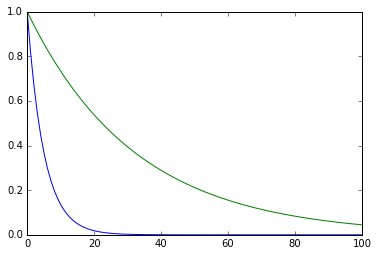

In [270]:
def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
xx = np.linspace(0,100,100)

plt.plot(xx,func(xx,1,5))
plt.plot(xx,func(xx,1,5*6.44))

65.4916376004
79.3395959809


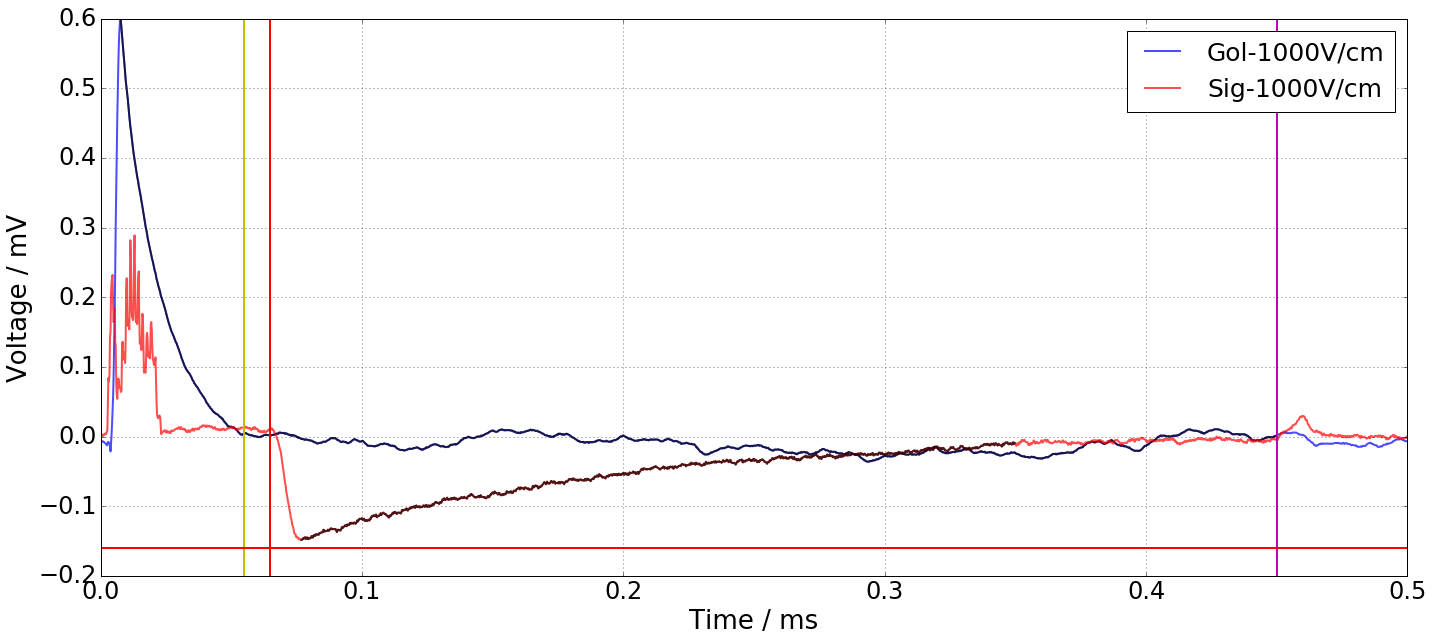

In [271]:
plt.figure(figsize=(20,9))

A = 0+3
B = 9+3

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
L = np.where(YY == max(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
golF = YY[L:R]

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2,color='r')
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
L = np.where(YY == min(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
sigF = abs(YY[L:R])

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.5)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.45,linewidth=2,color='m')
plt.axvline(0.065,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')

print(GOLDsum)
print(SIGsum)

plt.show()

RC = 0.0153714425248


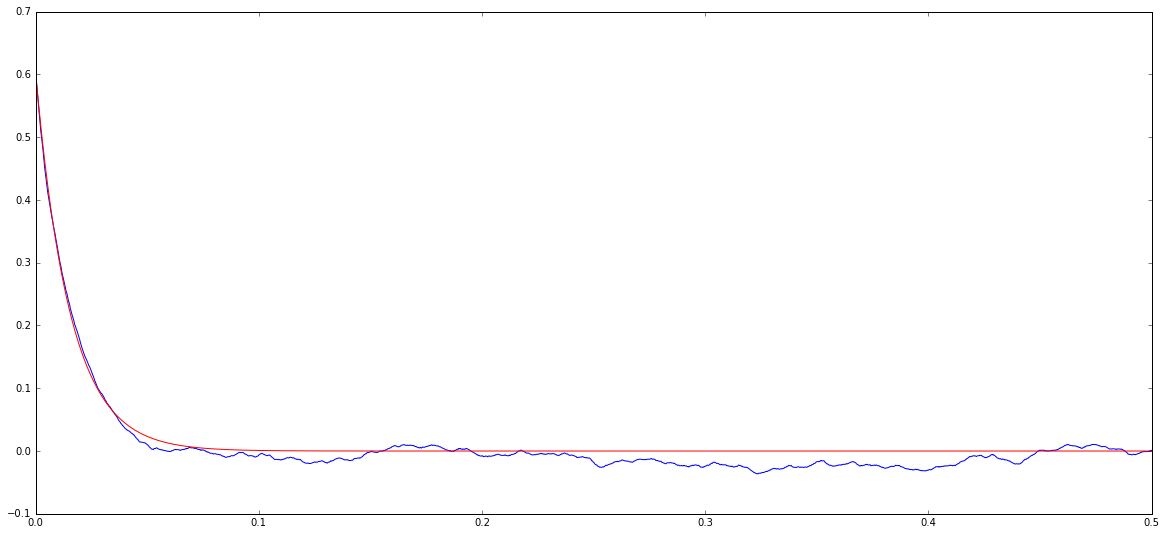

In [272]:
plt.figure(figsize=(20,9))
LL = len(golF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, golF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

In [273]:
popt

array([ 0.60284979,  0.01537144])

RC = 0.21843505608


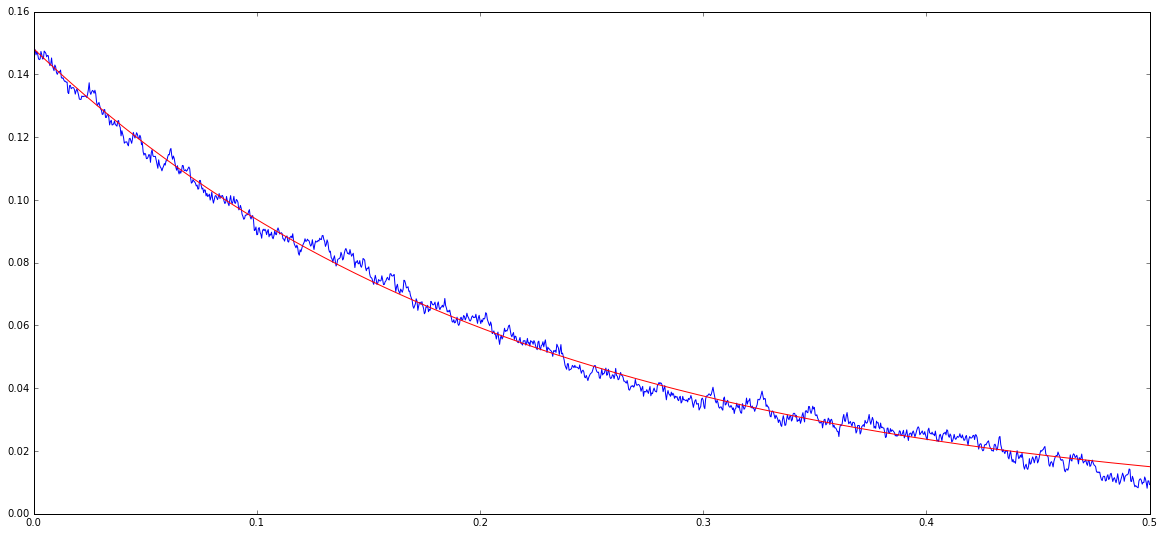

In [274]:
plt.figure(figsize=(20,9))
LL = len(sigF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,sigF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, sigF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

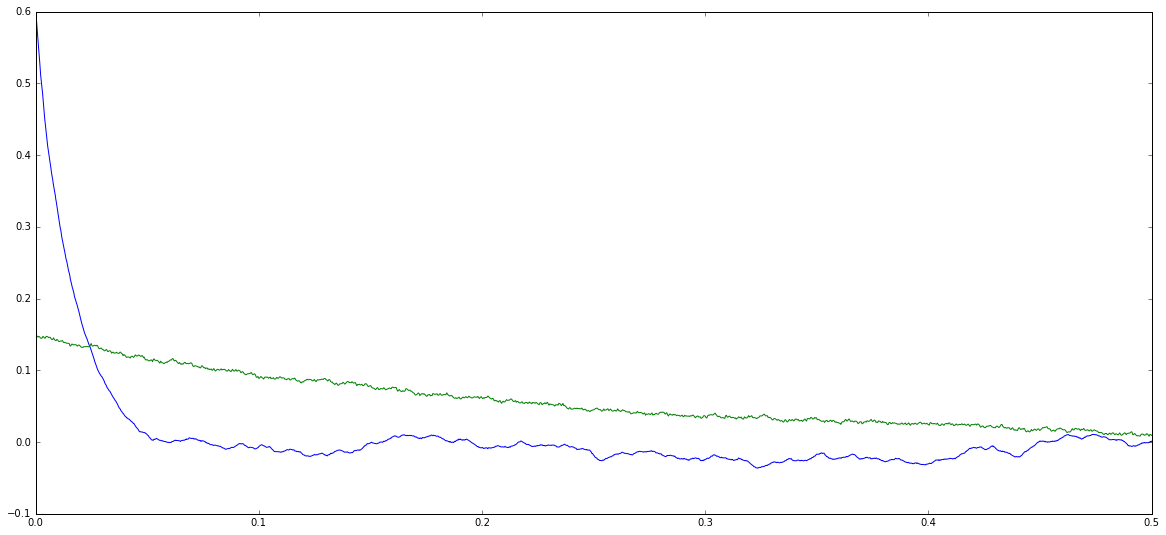

In [275]:
plt.figure(figsize=(20,9))
LL = len(golF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)

LL = len(sigF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,sigF)

44.789591867
88.2192963202


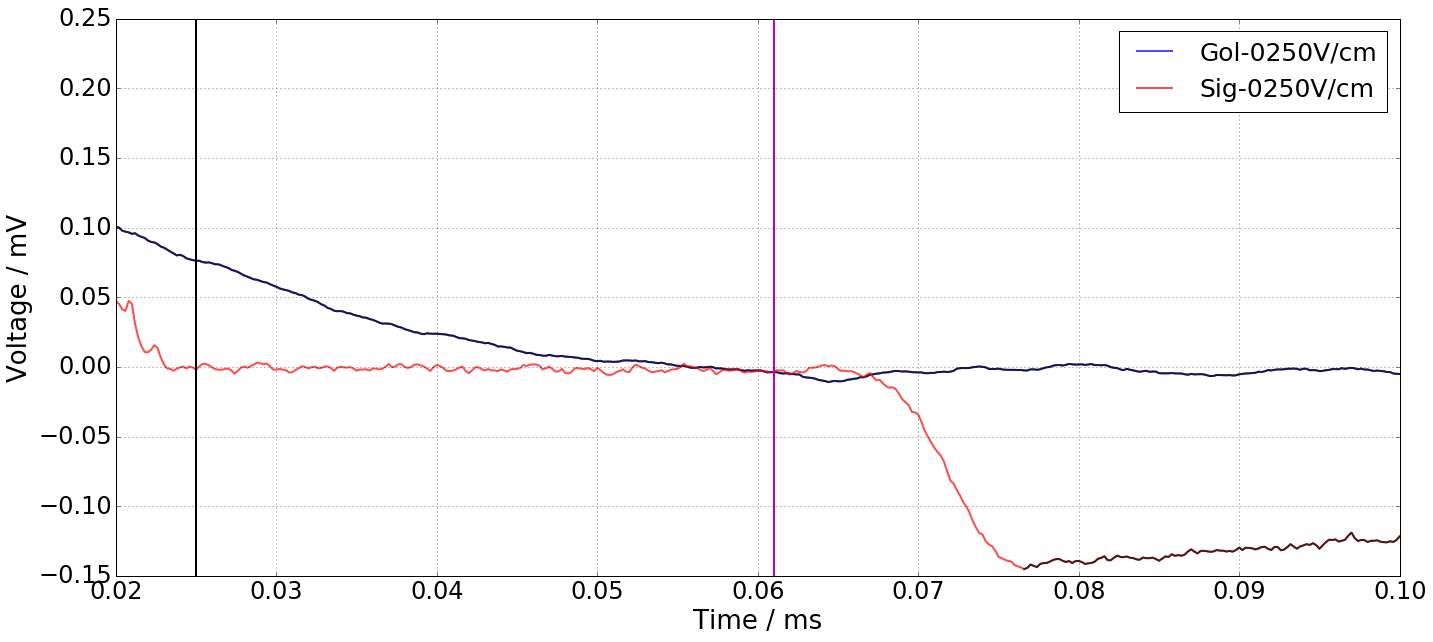

In [276]:
plt.figure(figsize=(20,9))

A = 0+1
B = 9+1

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
L = np.where(YY == max(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
golF = YY[L:R]

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2,color='r')
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
L = np.where(YY == min(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
sigF = abs(YY[L:R])

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m') 
#plt.xlim(-0.50,0.05)
plt.xlim(0.02,0.1)
#plt.ylim(-0.2,.1)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.0039,linewidth=2,color='y')
#plt.axvline(0.0076,linewidth=2,color='g')

#plt.axvline(0.075,linewidth=2,color='m')
#plt.axvline(0.066,linewidth=2,color='r')

plt.axvline(XX[2120],linewidth=2,color='k')
plt.axvline(XX[2300],linewidth=2,color='m')

print(GOLDsum)
print(SIGsum)

plt.show()

In [282]:
GOLD  = []
SIG   = []
GOLDM = []
SIGM  = []
extr  = []
for x in range(0,8):
    A = 0+x
    B = 9+x
    EXT = int(names[x].split('-')[1])
    extr.append(EXT)
    Corr = EXT/200
    
    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.45)
    R = np.where(XX == aa)[0][0]
    GOLDsum = sum(abs(YY[L:R]))
    maxx = abs(np.mean(YY[1600:1900]) - max(YY[L:R]))
    GOLDM.append( maxx*1.125)
    GOLD.append(GOLDsum*1.125)
    
    
    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.35)
    R = np.where(XX == aa)[0][0]
    SIGsum = sum(abs(YY[L:R]))*Corr
    ugh = np.mean(YY[2120:2300])
    if ugh<0:
        hh = min(YY[L:R])+ np.mean(YY[2120:2300])
        maxx = abs(hh)
    else:
        hh = min(YY[L:R])- np.mean(YY[2120:2300])
        maxx = abs(hh)
    SIGM.append(maxx*Corr*1.02)
    SIG.append(SIGsum*1.02)
SIGM = np.array(SIGM)
GOLDM = np.array(GOLDM)
extr = np.array(extr)

In [283]:
GOLDM

array([ 0.00838749,  0.25422453,  0.42588635,  0.68953766,  0.87448739,
        1.04711077,  1.14712602,  1.27609535])

In [284]:
SIGM

array([ 0.        ,  0.18695162,  0.45920621,  0.81440259,  1.03105809,
        1.18750475,  1.34749148,  1.63872803])

In [285]:
SIGM/GOLDM

array([ 0.        ,  0.73537996,  1.07823651,  1.18108501,  1.17904284,
        1.13407749,  1.17466735,  1.28417365])

In [286]:
-65e-6/np.log(SIGM/GOLDM)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([ 0.        ,  0.00021147, -0.00086291, -0.00039055, -0.00039465,
       -0.00051661, -0.00040376, -0.00025988])

In [287]:
extr

array([   0,  250,  500, 1000, 1500, 2000, 2500, 3000])

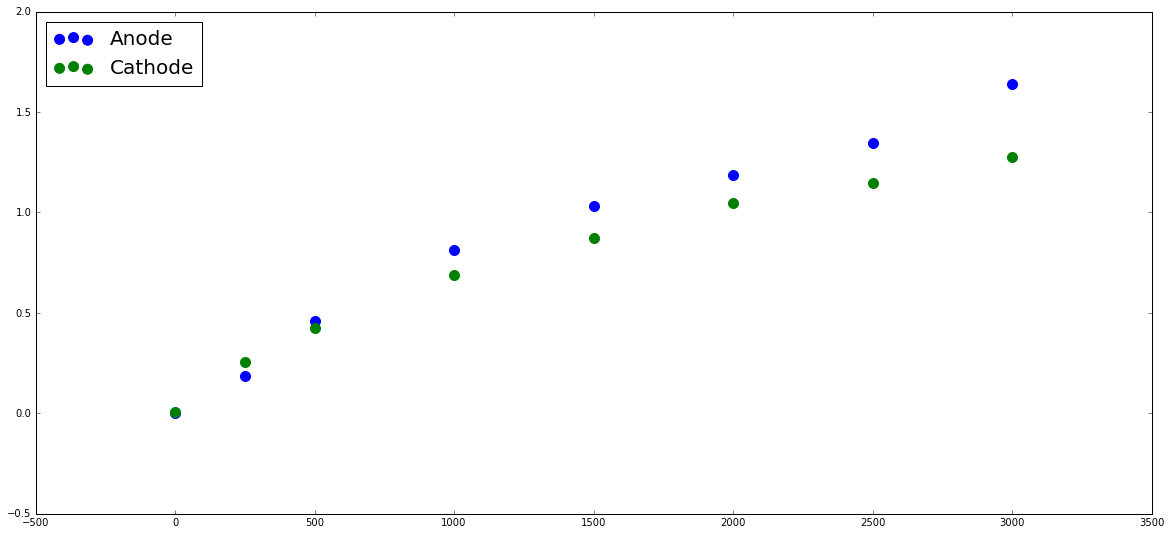

In [288]:
plt.figure(figsize=(20,9))

plt.scatter(extr,SIGM,color='b',label='Anode',s=100)
plt.scatter(extr,GOLDM,color='g',label='Cathode',s=100)

plt.legend(loc='upper left',fontsize=20)
plt.show()

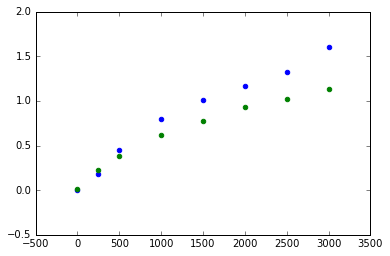

In [234]:
plt.scatter(extr,SIGM,color='b')
plt.scatter(extr,GOLDM,color='g')
plt.show()

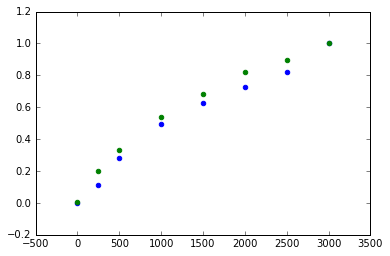

In [231]:
plt.scatter(extr,SIGM/max(SIGM),color='b')
plt.scatter(extr,GOLDM/max(GOLDM),color='g')
plt.show()

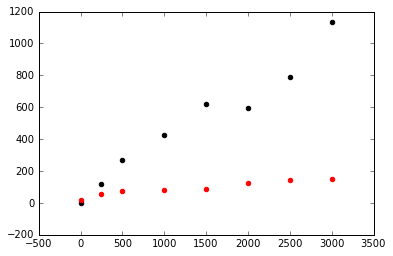

In [230]:
plt.scatter(extr,SIG,color='k')
plt.scatter(extr,GOLD,color='r')
plt.show()


In [8]:
Hold = np.loadtxt('Gol-200.txt')
GX200 = moving_average(Hold[0]*ml,avg)
GY200 = moving_average(Hold[1]*ml,avg)
Hold = np.loadtxt('Sig-200.txt')
SX200 = moving_average(Hold[0]*ml,avg)
SY200 = moving_average(Hold[1]*ml,avg)

In [9]:
aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

In [10]:
SIGsum/GOLDsum

0.32593764825619781

In [12]:
25/3000

0.008333333333333333

In [76]:
-0.085/np.log(SIGsum/GOLDsum)

0.093110348354314088

In [77]:
Hold = np.loadtxt('Gol-100.txt')
GX200 = moving_average(Hold[0]*ml,avg)
GY200 = moving_average(Hold[1]*ml,avg)
Hold = np.loadtxt('Sig-100.txt')
SX200 = moving_average(Hold[0]*ml,avg)
SY200 = moving_average(Hold[1]*ml,avg)

aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

-0.1/np.log(SIGsum/GOLDsum)

0.081052381049335001

Gol 2219.79199014
Sig 2068.54800161


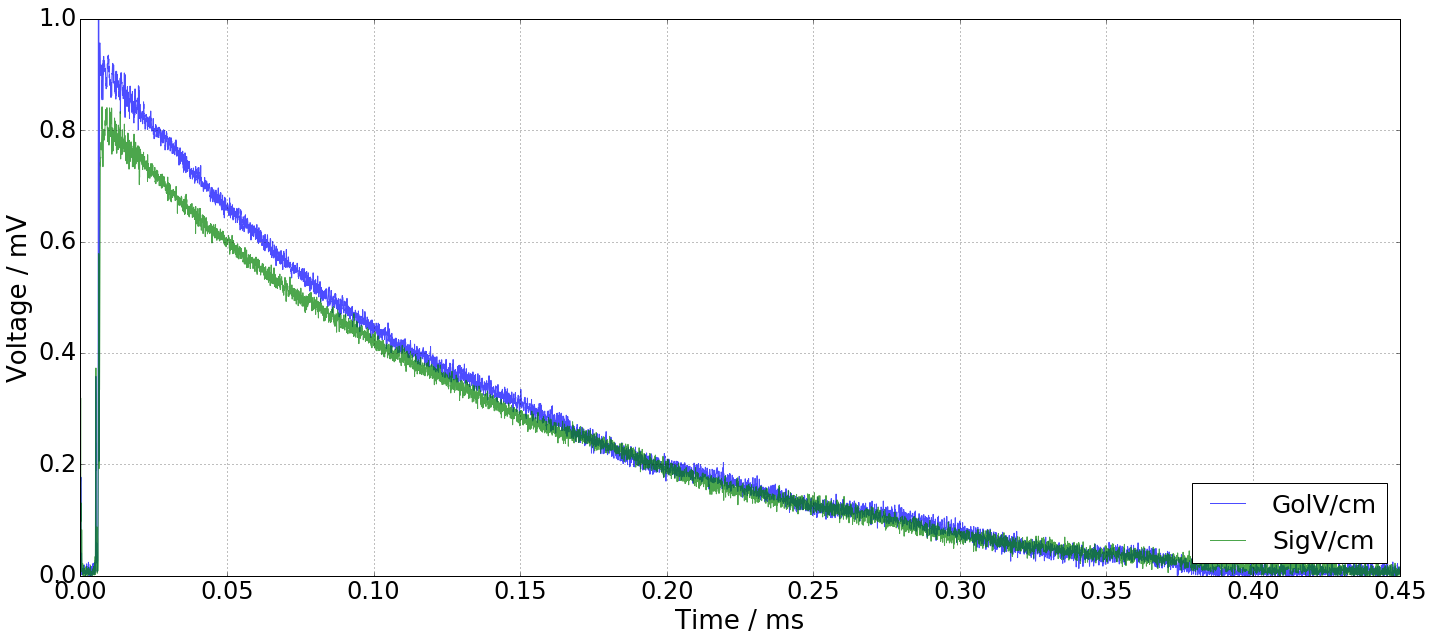

In [16]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,abs(YY),label=(names[q]+''+'V/cm'),alpha=0.7)
    print(names[q], sum(abs(YY)))
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.45)
plt.ylim(0,1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.show()

In [45]:
Xvals[0][1124]

0.006248914360803326

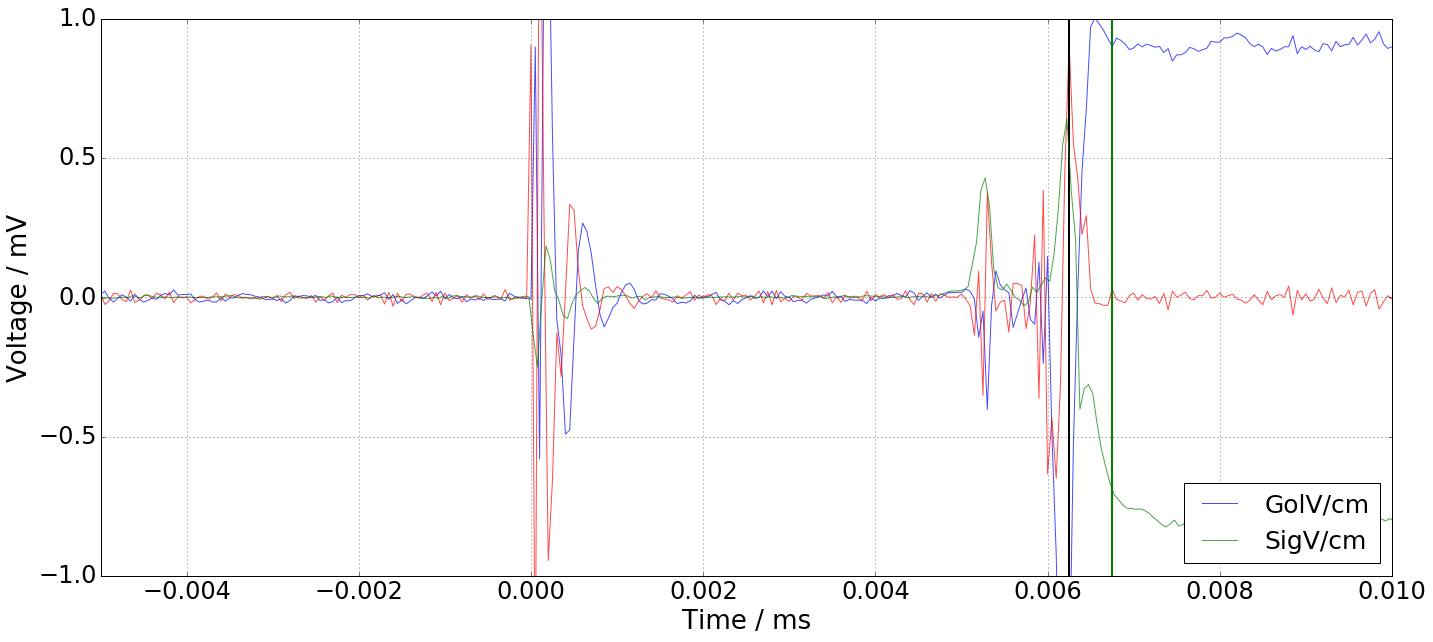

In [78]:
plt.figure(figsize=(20,9))

plt.plot(Xvals[0],Yvals[0],label=(names[0]+''+'V/cm'),alpha=0.7)

plt.plot(Xvals[0][:-1],np.diff(Yvals[0]),color='r',alpha=0.7)

plt.axvline(Xvals[0][1124],color='k',linewidth=2)
plt.axvline(Xvals[0][1134],color='g',linewidth=2)

plt.plot(Xvals[1],Yvals[1],label=(names[1]+''+'V/cm'),alpha=0.7)

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-.005,0.01)
#plt.xlim(-.10,0.45)

plt.ylim(-1,1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.show()

In [17]:
def cutter(Xval,Yval):
    xx = Xval
    yy = Yval
    dxx = Xval[:-1]
    dyy = np.diff(Yval)

    zeroxx = find_nearest(xx,0.003)
    xxLoc = np.where(xx==zeroxx)[0][0]

    maxx = max(dyy[xxLoc:])

    zeroLoc = np.where(dyy[xxLoc:]==maxx)[0][0]
    cutt = zeroLoc + xxLoc + 10
    return cutt



sum =  2185.31959726
cut sum =  2189.76229013
sum =  -2051.92383449
cut sum =  -2053.13056702


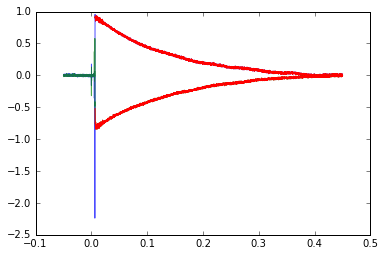

In [18]:
plt.plot(Xvals[0],Yvals[0],label=(names[0]+''+'V/cm'),alpha=0.7)
print('sum = ',sum(Yvals[0]))

cut = cutter(Xvals[0],Yvals[0])
plt.plot(Xvals[0][cut:],Yvals[0][cut:],color='r')
print('cut sum = ',sum(Yvals[0][cut:]))


plt.plot(Xvals[1],Yvals[1],label=(names[0]+''+'V/cm'),alpha=0.7)
print('sum = ',sum(Yvals[1]))

cut = cutter(Xvals[1],Yvals[1])
plt.plot(Xvals[1][cut:],Yvals[1][cut:],color='r')
print('cut sum = ',sum(Yvals[1][cut:]))



In [76]:
2047.05359156/2238.49168634

0.914478978881978

In [77]:
2044.71600744/2239.7971568

0.9129023140476201

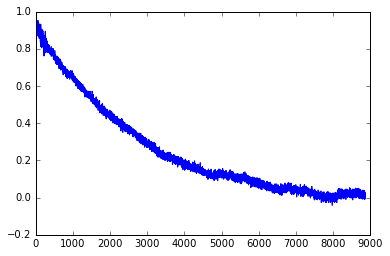

In [56]:
qq = np.arange(len(Yvals[0][cutt:]))
plt.plot(qq,Yvals[0][cutt:])

In [82]:
-50e-9/np.log(0.999023140476201)

5.1159428061413114e-05

In [70]:
#curve_fit(lambda t,a,b: a*np.exp(-t/b),  qq,  Yvals[0][cutt:],  p0=(1, 1e-3))
curve_fit(func, qq,  Yvals[0][cutt:])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([  9.48914295e-01,   4.04910250e-04,   1.00000000e+00]),
 array([[ inf,  inf,  inf],
        [ inf,  inf,  inf],
        [ inf,  inf,  inf]]))

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


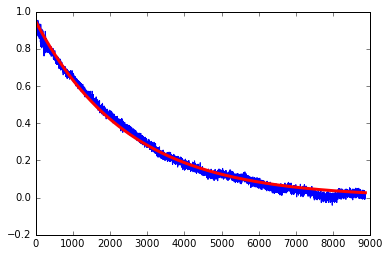

In [69]:
def func(x, a, b, c):
    return a * np.exp(-b * x) #+ c

popt, pcov = curve_fit(func, qq,  Yvals[0][cutt:])

plt.plot(qq,Yvals[0][cutt:])
plt.plot(qq,func(qq,*popt),color='r',linewidth=3)

In [64]:
popt

array([ 2.69251833,  1.29566755,  0.47484035])

In [86]:
cut = cutter(Xvals[0],Yvals[0])
qq = np.arange(len(Yvals[0][cut:]))
popt, pcov = curve_fit(func, qq,  Yvals[0][cut:])
print('fit sum = ',sum(func(qq,*popt)))


cut = cutter(Xvals[1],Yvals[1])
qq = np.arange(len(Yvals[1][cut:]))

popt, pcov = curve_fit(func, qq,  abs(Yvals[1][cut:]))
print('fit sum = ',sum(func(qq,*popt)))

fit sum =  2279.32375268
fit sum =  2087.25012721


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [42]:
xxLoc

1059

In [87]:
2087.25012721/2279.32375268

0.9157321880034979

In [18]:
len(np.diff(Yvals[0]))

10000

In [20]:
len(Xvals[0][:-1])

10000

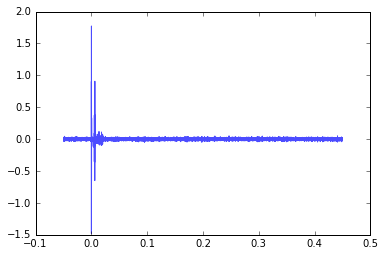

In [21]:
plt.plot(Xvals[0][:-1],np.diff(Yvals[0]),label=(names[0]+''+'V/cm'),alpha=0.7)


In [39]:
len(Xvals[0])

249703

In [74]:
def func(x, a, b, c, j):
    return a*np.exp(-x/b + j) + c

def func2(x, a, b, c):
    return a*np.exp(-x/b) + c

import scipy.special as sse
def fit_func(x, l, s, m):
    return 0.5*l*np.exp(0.5*l*(2*m+l*s*s-2*x))*sse.erfc((m+l*s*s-x)/(np.sqrt(2)*s)) # exponential gaussian

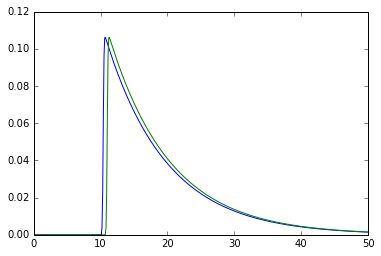

In [97]:
x = np.linspace(0,50,500)
y = fit_func(x-10, .11, 0.1, 0.4)
plt.plot(x,y)
y = fit_func(x-10, .11, 0.1, 1)
plt.plot(x,y)


(0, 5)

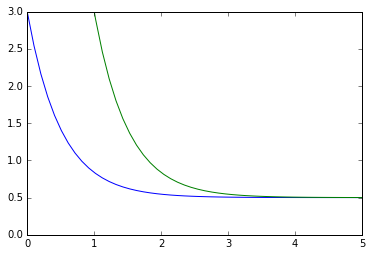

In [68]:
x = np.linspace(0,5,50)
y = func(x, 2.5, 0.5, 0.5,0)
plt.plot(x,y)

y = func(x-1, 2.5, 0.5, 0.5,0)
plt.plot(x,y)

plt.ylim(0,3)
plt.xlim(0,5)

In [43]:
a = int(3e4)
b = int(1e6)
GY=Yvals[0][a:b]
GX=Xvals[0][a:b]
SY=Yvals[1][a:b]
SX=Xvals[1][a:b]

In [103]:
def func(x, a, b, c):
    return a*np.exp(-x/b) + c

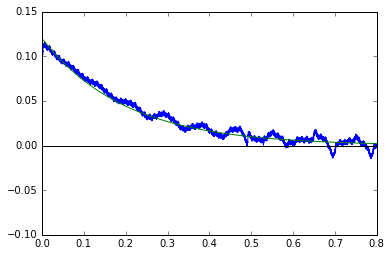

5237.3802341447017

In [141]:
a = int(3e4)
b = int(1e6)
c = b-a
GY=Yvals[0][a:b]
x = np.linspace(0,1,len(GY))

plt.plot(x,GY)

y = func(x, .12, 0.2, 0)
plt.plot(x,y)

plt.xlim(0,0.8)
plt.ylim(-0.1,0.15)
plt.axhline(0,color='k')
plt.show()
sum(y)

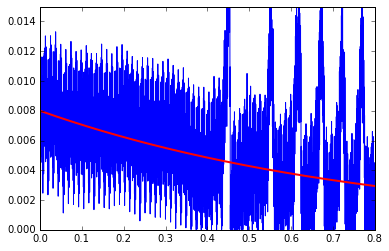

934.75007449008535

In [128]:
d = int(4.5e4)
e = int(d+c)
SY=abs(Yvals[1][d:e])
x = np.linspace(0,1,len(SY))

plt.plot(x,SY)

y = func(x, .008, 0.8, 0)
plt.plot(x,y,color='r',linewidth=2)

plt.xlim(0,0.8)
plt.ylim(-0,0.015)
plt.axhline(0,color='k')
plt.show()
sum(y)

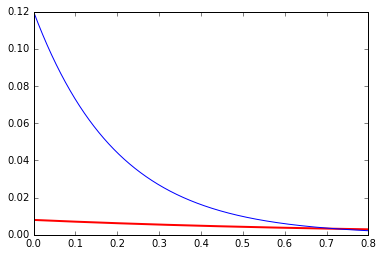

In [132]:
y = func(x, .008, 0.8, 0)
plt.plot(x,y,color='r',linewidth=2)

y = func(x, .12, 0.2, 0)
plt.plot(x,y)

plt.xlim(0,0.8)
#plt.ylim(-0,0.015)
plt.axhline(0,color='k')
plt.show()

In [ ]:
errfunc = lambda p, x, y: (two_gaussians(x, *p) - y)**2
optim, success = optimize.leastsq(errfunc, fitval, args=(Xhot[CUT:],Yhot[CUT:]))
optim

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


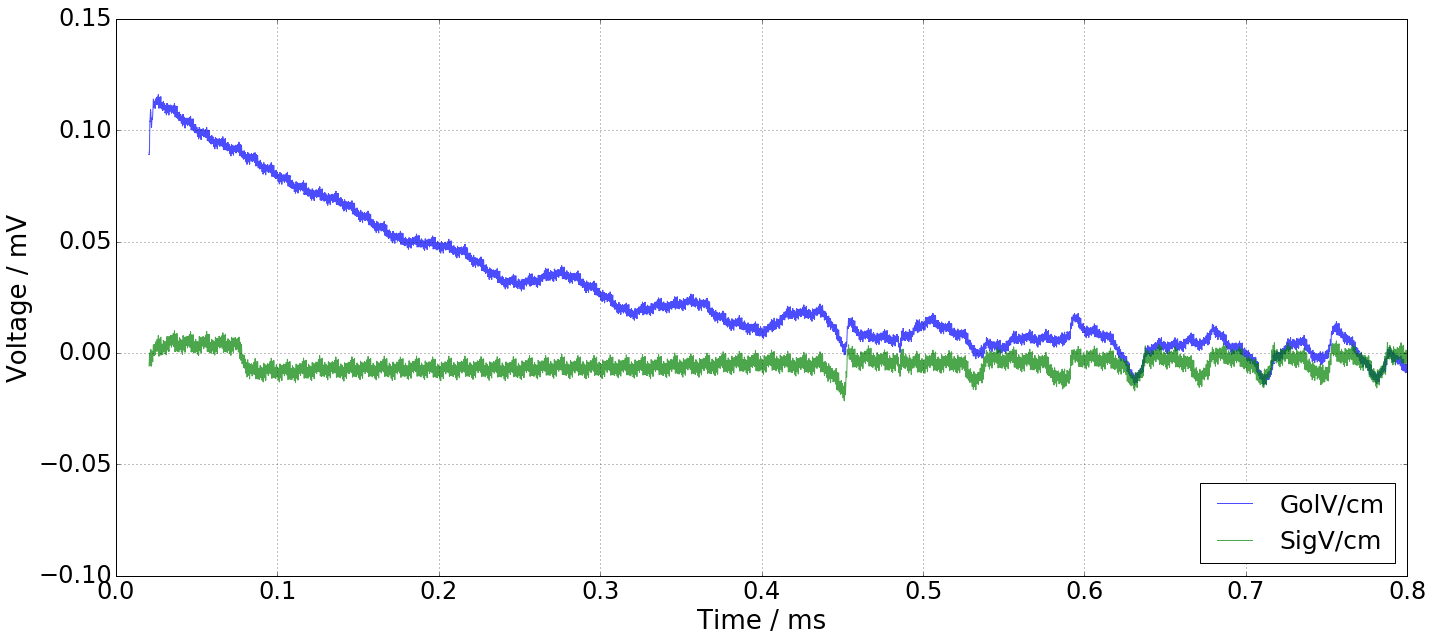

In [41]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = Xvals[q]
    YY = Yvals[q]
    a = 3e4
    b = 1e6
    plt.plot(XX[a:b],YY[a:b],label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.8)
plt.ylim(-0.1,0.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.show()

In [130]:
-80e-6/np.log(934/5237)

4.6402967910191064e-05

In [138]:
-80e-6/np.log(0.96)

0.0019597278609281422

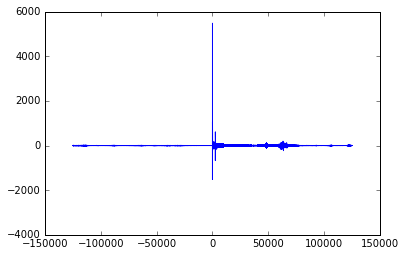

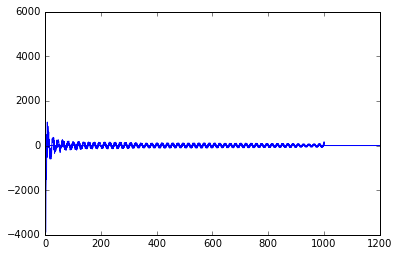

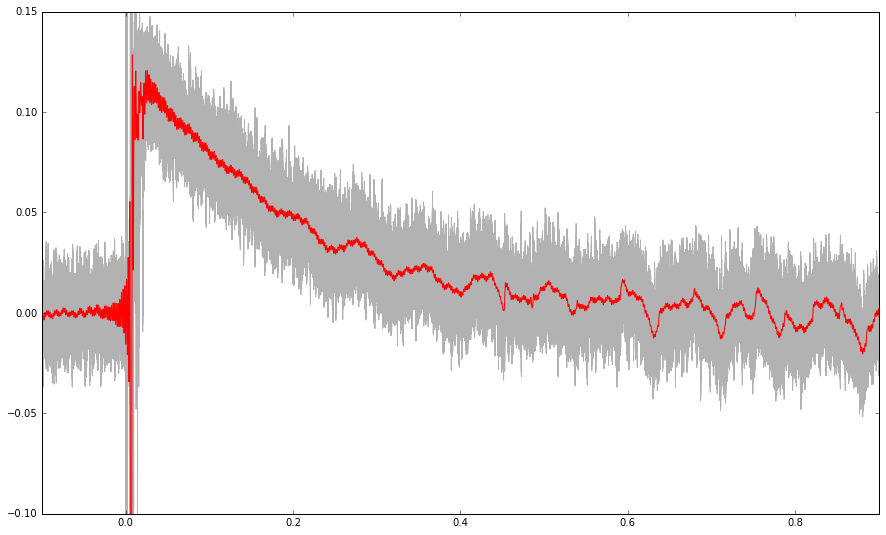

In [31]:
XX = Xvals[0]
YY = Yvals[0]

W = fftfreq(YY.size, d=XX[1]-XX[0])
f_signal = rfft(YY)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<0)] = 0
cut_f_signal[(W>1000)] = 0

cut_signal = irfft(cut_f_signal)


plt.plot(W,f_signal)
#plt.ylim(0,.2)
#plt.xlim(-10,100)
plt.show()
plt.plot(W,cut_f_signal)
plt.xlim(0,1200)
#plt.ylim(0,0.2)
plt.show()

plt.figure(figsize=(15,9))
plt.plot(XX,YY,label='raw',color='k',alpha=0.3)
plt.plot(XX,cut_signal,label='cut',color='r')
plt.xlim(-0.1,0.9)
plt.ylim(-0.1,0.15)
plt.show()

In [9]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [10]:
time,width = find_vals(Xvals[0],Yvals[0],Cut)
time

565.41007344975333

In [11]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(Xvals[q],Yvals[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [12]:
FWHM

array([ 228.41999423,  137.19999653,  114.8799971 ,   99.99999747,
         81.35999794,   74.05999813,   66.09999833])

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


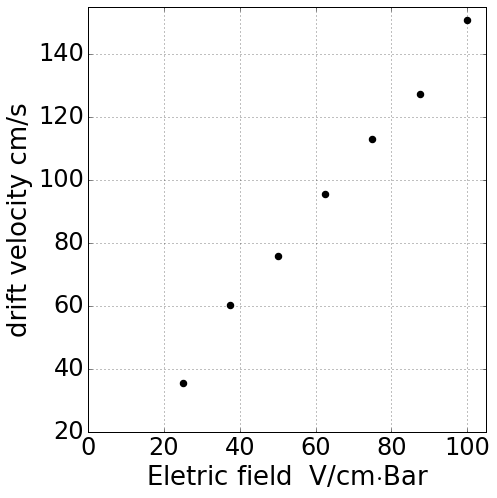

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

plt.xlim(0,105)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [16]:
vals = np.polyfit(Efield/2,Velocity,1)
np.poly1d(vals)[0]

1.7264611024940004

In [17]:
vals

array([ 1.47765616,  1.7264611 ])

In [15]:
np.polyfit?

In [ ]:
poly

In [ ]:
FWHM[0:6]

In [ ]:
x = np.log(Efield[1:6])
y = np.log(FWHM[1:6])
poly=np.polyfit(x,y,1)

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,np.poly1d(poly)(x))

In [ ]:
poly

In [ ]:
np.poly1d?

In [ ]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
#plt.plot(Efield,ef(Efield,*popt),'r',label='fit')
x=np.arange(1,30,0.1)
plt.plot(np.exp(x),np.exp(np.poly1d(poly)(x)))

#vars=np.logspace(1,3,10)
#plt.plot(vars,10**np.poly1d(poly)(np.log(vars)))
plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xlim(10,1000)
plt.ylim(50,300)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))
plt.loglog()
plt.legend(loc="upper right",fontsize=24)
plt.show()